In [1]:
import yfinance as yf
import os
import pandas as pd

In [2]:
# Initialize the ticker object for Polkadot (DOT)
dot_ticker = yf.Ticker("DOT-USD")

In [3]:
if os.path.exists("dot.csv"):
    dot = pd.read_csv("dot.csv", index_col=0)
else:
    dot = dot_ticker.history(period="max")
    dot.to_csv("dot.csv")

In [4]:
dot

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-08-20 00:00:00+00:00,2.787857,3.077784,2.692896,2.900080,48819867,0.0,0.0
2020-08-21 00:00:00+00:00,2.896923,3.090093,2.730919,2.875028,49313137,0.0,0.0
2020-08-22 00:00:00+00:00,2.878570,4.510613,2.816762,4.484690,485801096,0.0,0.0
2020-08-23 00:00:00+00:00,4.487058,4.487058,3.716271,3.967066,320749483,0.0,0.0
2020-08-24 00:00:00+00:00,3.987413,4.783158,3.812670,4.602614,407690171,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-11 00:00:00+00:00,8.418827,8.515911,8.201010,8.379441,220806144,0.0,0.0
2024-04-12 00:00:00+00:00,8.379780,8.482064,6.600109,7.241089,650188288,0.0,0.0
2024-04-13 00:00:00+00:00,7.241166,7.324754,5.810125,6.417978,670503551,0.0,0.0


In [6]:
dot.index = pd.to_datetime(dot.index)

In [7]:
del dot["Dividends"]# delete dividends and stock splits column
del dot["Stock Splits"]

In [8]:
dot.columns = [c.lower() for c in dot.columns] #convert to lower case

<Axes: xlabel='Date'>

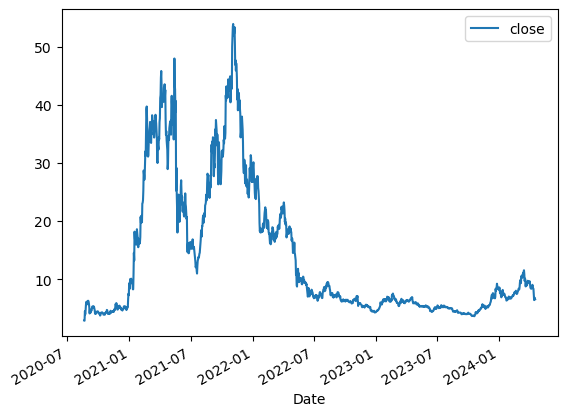

In [9]:
dot.plot.line(y="close", use_index=True)

In [10]:
wiki = pd.read_csv("wikipedia_edits_dot.csv", index_col=0, parse_dates=True)

In [11]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.0,0.0,0.0
2009-04-07,0.0,0.0,0.0
2009-04-08,0.0,0.0,0.0
2009-04-09,0.0,0.0,0.0
2009-04-10,0.0,0.0,0.0
...,...,...,...
2024-04-11,0.0,0.0,0.0
2024-04-12,0.0,0.0,0.0
2024-04-13,0.0,0.0,0.0
2024-04-14,0.0,0.0,0.0


### Preparing data for machine learning

In [13]:
wiki.index = wiki.index.tz_localize('UTC')

TypeError: Already tz-aware, use tz_convert to convert.

In [14]:
dot = dot.merge(wiki, left_index=True, right_index=True)

In [15]:
dot["tomorrow"] = dot["close"].shift(-1)

In [16]:
dot["target"] = (dot["tomorrow"] > dot["close"]).astype(int)

In [17]:
dot["target"].value_counts()

target
0    668
1    666
Name: count, dtype: int64

In [18]:
dot

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2020-08-20 00:00:00+00:00,2.787857,3.077784,2.692896,2.900080,48819867,0.0,0.0,0.0,2.875028,0
2020-08-21 00:00:00+00:00,2.896923,3.090093,2.730919,2.875028,49313137,0.0,0.0,0.0,4.484690,1
2020-08-22 00:00:00+00:00,2.878570,4.510613,2.816762,4.484690,485801096,0.0,0.0,0.0,3.967066,0
2020-08-23 00:00:00+00:00,4.487058,4.487058,3.716271,3.967066,320749483,0.0,0.0,0.0,4.602614,1
2020-08-24 00:00:00+00:00,3.987413,4.783158,3.812670,4.602614,407690171,0.0,0.0,0.0,5.523393,1
...,...,...,...,...,...,...,...,...,...,...
2024-04-10 00:00:00+00:00,8.660017,8.686889,8.192951,8.418901,300776050,0.0,0.0,0.0,8.379441,0
2024-04-11 00:00:00+00:00,8.418827,8.515911,8.201010,8.379441,220806144,0.0,0.0,0.0,7.241089,0
2024-04-12 00:00:00+00:00,8.379780,8.482064,6.600109,7.241089,650188288,0.0,0.0,0.0,6.417978,0
2024-04-13 00:00:00+00:00,7.241166,7.324754,5.810125,6.417978,670503551,0.0,0.0,0.0,6.869346,1


In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = dot.iloc[:-200]
test = dot.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [21]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.6129032258064516

In [22]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

### Evaluating error with backtesting

In [23]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

### Using an XGBoost model

In [25]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(dot, model, predictors)

In [26]:
predictions["predictions"].value_counts()

predictions
0    144
1     95
Name: count, dtype: int64

In [27]:
precision_score(predictions["target"], predictions["predictions"])

0.4842105263157895

In [28]:
def compute_rolling(eth):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = dot.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        dot[ratio_column] = dot["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        dot[edit_column] = rolling_averages["edit_count"]

        rolling = eth.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        dot[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return dot, new_predictors

In [29]:
dot, new_predictors = compute_rolling(dot.copy())

In [30]:
predictions = backtest(dot, model, new_predictors)

In [31]:
precision_score(predictions["target"], predictions["predictions"])

0.5368421052631579

In [1]:
predictions

NameError: name 'predictions' is not defined